In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data= np.loadtxt("data.txt",dtype=float);
data

array([-4.22, -3.38, -3.04, -2.15, -5.53, -2.43, -4.  , -2.79, -2.75,
       -2.69, -3.67, -3.59, -2.45, -2.61, -3.98, -2.32])

# Закон распределения прямоугольного треугольника

$$
f(x)=
\begin{cases}
0 & \quad x < a\\ 
\dfrac{2(x-a)}{(b-a)^2} & \quad a \leq x \leq b\\
0 & \quad x > b
\end{cases}
\quad \quad \quad \quad
F(x)=
\begin{cases}
0 & \quad x < a\\ 
\dfrac{(x-a)^2}{(b-a)^2} & \quad a \leq x \leq b\\
1 & \quad x > b
\end{cases} 
$$

# Строим вариационный ряд

In [28]:
variation_series = np.sort(data)
variation_series
df = pd.DataFrame([variation_series, np.arange(1, len(variation_series) + 1) / len(variation_series)]).T

df.columns = ['xi', 'pi']

df

,xi,pi
0,-5.53,0.0625
1,-4.22,0.1250
2,-4.00,0.1875
3,-3.98,0.2500
4,-3.67,0.3125
5,-3.59,0.3750
6,-3.38,0.4375
7,-3.04,0.5000
8,-2.79,0.5625
9,-2.75,0.6250


# Эмперическая функция распределения

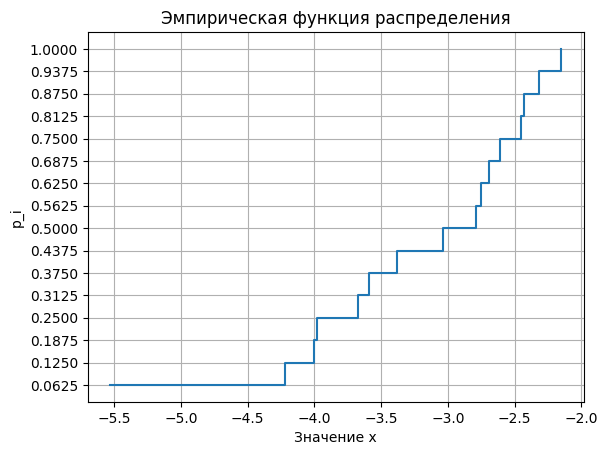

In [29]:
# Вычисление вероятностей
n = len(variation_series)
probabilities = np.arange(1, n+1) / n

plt.grid(True)

plt.yticks(probabilities)

# Построение графика
plt.step(variation_series, probabilities, where='post')

# Установка подписей осей и заголовка
plt.xlabel('Значение x')
plt.ylabel('p_i')
plt.title('Эмпирическая функция распределения')

# Отображение графика
plt.show()


$\tilde m \text{ - несмещённая оценка математического ожидания}$

$\tilde d\text{ - несмещённая оценка дисперсии}$

$\tilde m = \dfrac{1}{n}\sum_{i=1}^nx_i^* \quad \quad \quad \tilde d = \dfrac{1}{n-1}\sum_{i=1}^n(x_i^*-\tilde m)^2$

In [30]:
n = len(variation_series)
m = (sum(variation_series))/n
summ = 0
d = (sum((i - m)**2 for i in variation_series))/(n-1)

print(f"m = {m}\nd = {d}")

m = -3.2249999999999996
d = 0.8099866666666667


### Так как у нас закон распределения прямоугольного треугольника, то у нас 2 неизвестынх параметра (a, b)

### Выразим неизвестные параметры через выбранные моменты

$$
m = \int_{-\infty}^\infty xf(x)dx = \int_{-\infty}^a 0dx + \int_a^b \dfrac{2(x-a)}{(b-a)^2}dx + \int_b^{+\infty} 0dx = \dfrac{2}{(b-a)^2}\int_a^b(x-a)d(x-a) = \dfrac{1}{(b-a)^2}(x-a)^2|^b_a =
$$
$$
= \dfrac{2}{(b-a)^2}\left(\dfrac{x^3}{3} - \dfrac{ax^2}{2}\right)|^b_a = \dfrac{2}{(b-a)^2}\left(\dfrac{b^3-a^3}{3} - \dfrac{a(b^2-a^2)}{2}\right) = \dfrac{2}{b-a}\left(\dfrac{2a^2+2ab+2b^2-3a^2-3ab}{6}\right) = \dfrac{2b+a}{3}
$$

$$
\sigma^2 = \int_{-\infty}^{+\infty} (x-m)^2f(x)dx = \int_{-\infty}^{+\infty}x^2f(x)dx - m^2 = \int_b^ax^2\dfrac{2(x-a)}{(b-a)^2}dx - \dfrac{(2b+a)^2}{3^2} = \dfrac{2}{(b-a)^2}\int_a^b(x^3-ax^2)dx - \dfrac{(2b+a)^2}{9} = \dfrac{2}{(b-a)^2}\left(\left(\dfrac{x^4}{4}-\dfrac{a}{3}x^3\right)|^b_a\right) - \dfrac{(2b+a)^2}{9} = 
$$
$$
= \dfrac{3(b^2-a^2)(b^2+a^2) - 4(b-a)(a^2+ab+b^2)a}{6(b-a)^2} - \dfrac{(2b+a)^2}{9} = \dfrac{-a^3 - a^2b - ab^2 + 3b^2}{6(b-a)} - \dfrac{(2b+a)^2}{9} = \dfrac{(a-b)^2}{18}
$$

$$
m = \dfrac{a+2b}{3}\quad \quad \quad \quad \sigma^2 = \dfrac{(b-a)^2}{18} \\ 
$$
$$
a = m - 2\sqrt{2}\sigma\quad \quad \quad \quad b = m + \sqrt{2}\sigma
$$
### Дальше мы подставляем оценки мат. ожидания и дисперсии в формулы и получаем оценки наших параметров

In [31]:
a = m - 2*np.sqrt(2)*np.sqrt(d)
b = m+np.sqrt(2)*np.sqrt(d)
print(f"a = {a}\nb = {b}")

a = -5.770563460873316
b = -1.9522182695633417


# Построение оценок

$$
f(x)=
\begin{cases}
0 & \quad x < -5.77\\ 
\dfrac{2x+11.541}{14.579} & \quad -5.77 \leq x \leq -1.952\\
0 & \quad x > -1.952
\end{cases}
\quad \quad \quad \quad
F(x)=
\begin{cases}
0 & \quad x < -5.77\\ 
\dfrac{(x+5.77)^2}{14.579} & \quad -5.77 \leq x \leq -1.952\\
1 & \quad x > -1.952
\end{cases} 
$$

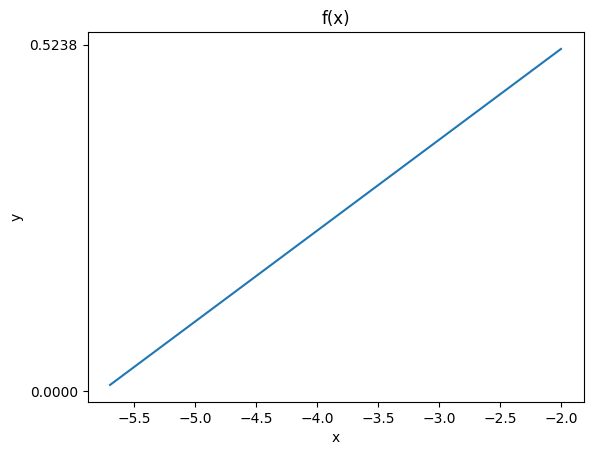

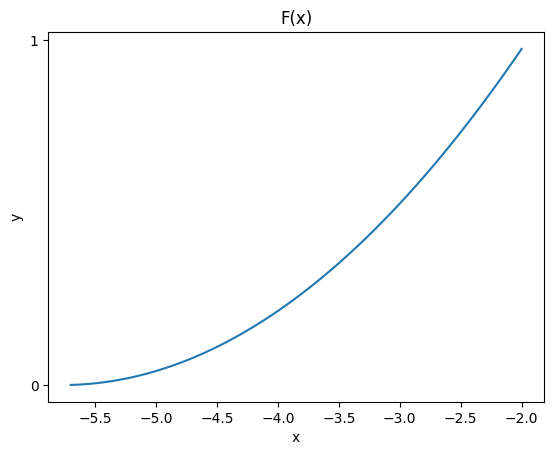

In [32]:

# System 1
x1 = np.linspace(-5.7, -2, 100)
y1 = np.piecewise(x1, [x1 < -5.77, (x1 >= -5.77) & (x1 <= -1.952), x1 > -1.952], [0, lambda x: (2*x+11.541)/(14.579), 0])

plt.plot(x1, y1)

plt.yticks([0.0, 0.52381705])
plt.xlabel('x')
plt.ylabel('y')
plt.title('f(x)')
plt.show()

# System 1
x1 = np.linspace(-5.7, -2, 100)
y1 = np.piecewise(x1, [x1 < -5.77, (x1 >= -5.77) & (x1 <= -1.952), x1 > -1.952], [0, lambda x: (x+5.77)**2/14.579, 1])

plt.plot(x1, y1)

plt.yticks([0.0, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('F(x)')
plt.show()



